## ML4DS Lab - Week 4 - Support Vector Machines (SVM) and K-means

### Aims:
    * Generate your own data to test classifiers
    * Practice Support Vector Machine - tuning soft margin and kernel parameters
    * Practise K-means and Kernel K-means
    

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
%matplotlib inline
import pylab as plt
from matplotlib.colors import ListedColormap

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

### Task 1: Generate your own data to test binary classifiers

Generate two dimensional Gaussian distributed data for two different classes

 * Generate multivariate Gaussian random samples: 
         https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multivariate_normal.html
         
 * Plot is based on $$\mbox{class 0}: \mu_0 = \begin{bmatrix} 1 \\ 2 \end{bmatrix}, \Sigma_0=\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$$, $$\mbox{class 1}: \mu_1 = \begin{bmatrix} 7 \\ 7 \end{bmatrix}, \Sigma_1=\begin{bmatrix} 2 & 0 \\ 0 & 2 \end{bmatrix}$$ 

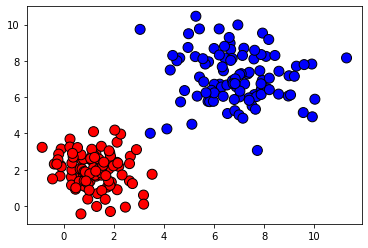

In [2]:
np.random.seed(1)

# Data of class 0
mean_0 = (1, 2)
cov_0 = [[1, 0], [0, 1]]
x_0 = np.random.multivariate_normal(mean_0, cov_0, size = 100)
t_0 = np.zeros_like(x_0)[:, 0]

# Data of class 1
mean_1 = (7, 7)
cov_1 = [[2, 0], [0, 2]]
x_1 = np.random.multivariate_normal(mean_1, cov_1, size = 100)
t_1 = np.ones_like(x_1)[:, 0]

# Combine data and labels into X and t
X = np.vstack((x_0, x_1))
t = np.hstack((t_0, t_1))
plt.scatter(X[:, 0], X[:, 1], c = t, cmap = cmap_bold, edgecolor = 'k', s = 100)
plt.show()

### Task 2: Use SVM on generated data, with different margins and kernerls.

Reference to SVM in sklearn:
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

Plot the decision boundary. For that, we will assign a color to each point in the mesh [x_min, x_max] x [y_min, y_max].

In [3]:
h = 0.02
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#### Task 2.1 Test hard margin SVM without kernel projection

##### The SVC function in sklearn implements a SVM with soft margin. It has a parameter `C` controling how soft the margin is. Based on your understanding of soft margin SVM, choose a value for `C` that is equivalent to a hard margin SVM.

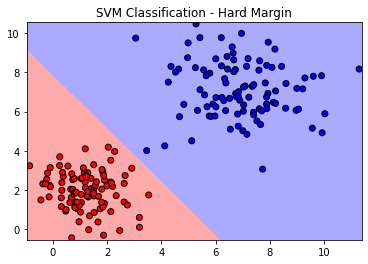

In [4]:
from sklearn.svm import SVC

svm = SVC(C = 1000, kernel = 'linear').fit(X, t)
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, cmap = cmap_light)
plt.scatter(X[:, 0], X[:, 1], c = t, cmap = cmap_bold, edgecolor = 'k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('SVM Classification - Hard Margin')
plt.show()

#### Task 2.2 Test soft margin SVM without kernel projection

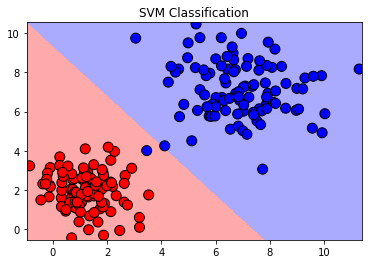

In [5]:
from sklearn.svm import SVC

svm = SVC(C = 0.05, kernel = 'linear').fit(X, t)
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, cmap = cmap_light)
plt.scatter(X[:, 0], X[:, 1], c = t, cmap = cmap_bold, edgecolor = 'k', s = 100)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('SVM Classification')
plt.show()

#### Task 2.3: Test non linear data.

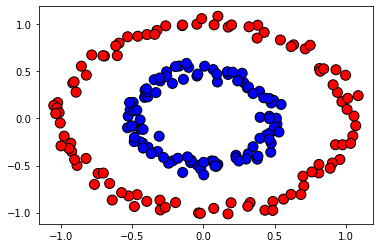

In [6]:
from sklearn import cluster, datasets

n_samples = 200
np.random.seed(1)
noisy_circles = datasets.make_circles(n_samples = n_samples, factor = 0.5, noise = 0.05)

X = noisy_circles[0]
t = noisy_circles[1]
plt.scatter(X[:, 0], X[:, 1], c = t, cmap = cmap_bold, edgecolor = 'k', s = 100)
plt.show()

Plot the decision boundary. For that, we will assign a color to each point in the mesh [x_min, x_max] x [y_min, y_max].

In [7]:
h = 0.02
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#### Train SVM classifier with the RBF kernel:

Test different `gamma` (1e-3, 1e+3) and margin values `C` (1e-3, 1e+2).

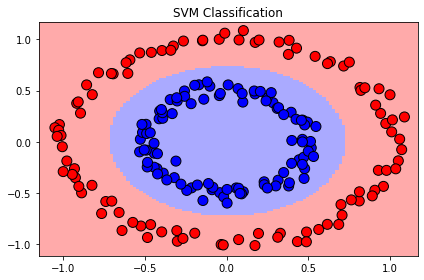

In [8]:
from sklearn.svm import SVC

svm = SVC(C = 1e-3, kernel = 'rbf', gamma = 1).fit(X, t)
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, cmap = cmap_light)
plt.scatter(X[:, 0], X[:, 1], c = t, cmap = cmap_bold, edgecolor = 'k', s = 100)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('SVM Classification')
plt.tight_layout()
plt.show()

#### Task 2.4: Use cross-validation to determine best  `C` and `gamma` values





In [9]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'C': [1e-3, 1e+3],
    'gamma': [1e-3, 1e+2]
}
svm_cv = GridSearchCV(SVC(), parameters).fit(X, t)
print(svm_cv.best_params_)

{'C': 1000.0, 'gamma': 100.0}


### Task 3: Test clustering on 'Moon data'

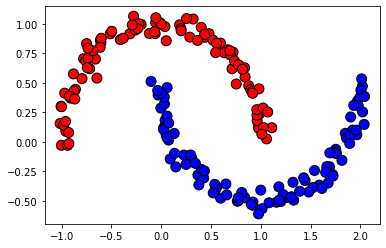

In [10]:
np.random.seed(1)
noisy_moons = datasets.make_moons(n_samples = n_samples, noise = 0.05)
X = noisy_moons[0]
t = noisy_moons[1]
plt.scatter(X[:, 0], X[:, 1], c = t, cmap = cmap_bold, edgecolor = 'k', s = 100)
plt.show()

#### Fit `KMeans` on the data and color each data point with its cluster membership  
Reference: 
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

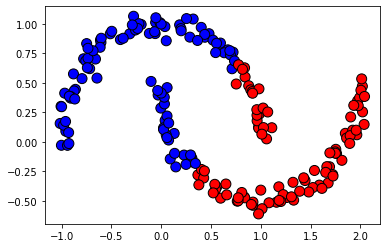

In [11]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2, random_state = 0).fit(X)
plt.scatter(X[:, 0], X[:, 1], c = kmeans.labels_, cmap = cmap_bold, edgecolor = 'k', s = 100)
plt.show()

#### Task 3.2: Use `SpectralClustering` for Kernel K-Means with RBF and gamma. Test different Gamma values.

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html

`affinity` = 'rbf'
`gamma` = 12

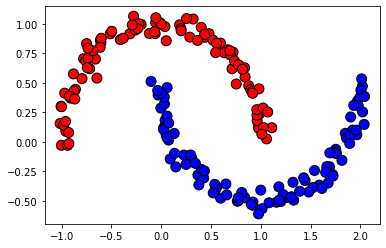

In [12]:
from sklearn.cluster import SpectralClustering

clustering = SpectralClustering(n_clusters = 2, affinity = 'rbf', gamma = 12).fit(X)
plt.scatter(X[:, 0], X[:, 1], c = clustering.labels_, cmap = cmap_bold, edgecolor = 'k', s = 100)
plt.show()